## –ó–∞–≥—Ä—É–∑–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [524]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# –æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö
import re
import string
import demoji
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
# –º–æ–¥–µ–ª–∏
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
# —É–ª—É—á—à–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from yellowbrick.model_selection import LearningCurve
# –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve

# –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –æ–ø–∏—Å–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞

In [387]:
data = pd.read_csv('cyberbullying_tweets.csv')
display(data.shape)
data.head()

(47692, 2)

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

–î–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç 2 —Å—Ç–æ–ª–±—Ü–∞ –∏ 47692 —Å—Ç—Ä–æ–∫–∏.

**–°—Ç–æ–ª–±—Ü—ã:**

- tweet_text: —Ç–µ–∫—Å—Ç –ø–æ—Å—Ç–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è —Å–æ—Ü–∏–∞–ª—å–Ω–æ–π —Å–µ—Ç–∏ Twitter

- cyberbullying_type: –∫–ª–∞—Å—Å, –∫ –∫–æ—Ç–æ—Ä–æ–º—É –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫–∏–±–µ—Ä–±—É–ª–ª–∏–Ω–≥ –≤ –ø–æ—Å—Ç–µ

In [523]:
list(data['cyberbullying_type'].unique())

['not_cyberbullying',
 'gender',
 'religion',
 'other_cyberbullying',
 'age',
 'ethnicity']

–¢–∏–ø –∫–∏–±–µ—Ä–±—É–ª–ª–∏–Ω–≥–∞ - –∫–∞—á–µ—Å—Ç–≤–æ, –Ω–∞ –æ—Å–Ω–æ–≤–µ –∫–æ—Ç–æ—Ä–æ–≥–æ –æ—Å—É—â–µ—Å—Ç–≤–ª—è–µ—Ç—Å—è –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ü–∏—è.

**–í –¥–∞—Ç–∞—Å–µ—Ç –≤–∫–ª—é—á–µ–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ —Ç–∏–ø—ã:**

- religion (—Ä–µ–ª–∏–≥–∏—è)

- age (–≤–æ–∑—Ä–∞—Å—Ç)

- gender (–ø–æ–ª)

- ethnicity (—ç—Ç–Ω–∏—á–µ—Å–∫–∞—è –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç—å)

- not_cyberbullying (–∫–∏–±–µ—Ä–±—É–ª–ª–∏–Ω–≥–∞ –Ω–µ—Ç)

- other_cyberbullying (–¥—Ä—É–≥–æ–π —Ç–∏–ø –∫–∏–±–µ—Ä–±—É–ª–ª–∏–Ω–≥–∞)

**–†–µ—à–∞–µ–º–∞—è –∑–∞–¥–∞—á–∞:**

–ü–æ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏—é —Ç–≤–∏—Ç–æ–≤ (–ø–æ—Å—Ç–æ–≤ —Å–æ—Ü–∏–∞–ª—å–Ω–æ–π —Å–µ—Ç–∏ Twitter) –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –∫–∞–∫–æ–π —Ç–∏–ø –∫–∏–±–µ—Ä–±—É–ª–ª–∏–Ω–≥–∞ —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è –≤ –Ω–µ–º. –î–∞–Ω–Ω–∞—è –∑–∞–¥–∞—á–∞ –≤ –º–∞—à–∏–Ω–Ω–æ–º –æ–±—É—á–µ–Ω–∏–∏ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫ –∑–∞–¥–∞—á–∞–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

# –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

In [331]:
data.isnull().sum() 

tweet_text            0
cyberbullying_type    0
dtype: int64

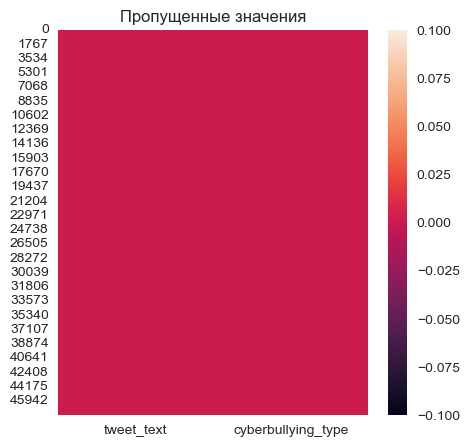

In [521]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(data.isnull())
ax.set(title = '–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.show()

–í –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–µ—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.

In [510]:
data['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

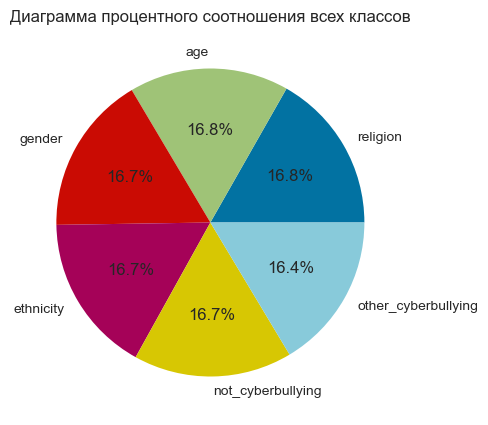

In [519]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.pie(list(data['cyberbullying_type'].value_counts()), 
       labels=data['cyberbullying_type'].value_counts().index, 
       autopct='%1.1f%%'       )
ax.set(title = '–î–∏–∞–≥—Ä–∞–º–º–∞ –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–≥–æ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—è –≤—Å–µ—Ö –∫–ª–∞—Å—Å–æ–≤')
plt.show()

–î–∏c–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤ –Ω–µ—Ç.

**–û—Å–Ω–æ–≤–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è:**

In [333]:
data.describe()

tweet_text cyberbullying_type
count                                               47692              47692
unique                                              46017                  6
top     RT @sailorhg: the intro for my hardware hackin...           religion
freq                                                    2               7998

In [334]:
data.info() #–Ω–∞–∑–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–µ–Ω—É–ª–µ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


–í –æ–±–æ–∏—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è —Å—Ç—Ä–æ–∫–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ.

## –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

–†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ X –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é y.

In [401]:
X = data[['tweet_text']]
X.head()

tweet_text
0  In other words #katandandre, your food was cra...
1  Why is #aussietv so white? #MKR #theblock #ImA...
2  @XochitlSuckkks a classy whore? Or more red ve...
3  @Jason_Gio meh. :P  thanks for the heads up, b...
4  @RudhoeEnglish This is an ISIS account pretend...

In [390]:
y = data[['cyberbullying_type']]
y.head()

cyberbullying_type
0  not_cyberbullying
1  not_cyberbullying
2  not_cyberbullying
3  not_cyberbullying
4  not_cyberbullying

# –û–±—Ä–∞–±–æ—Ç–∫–∞ –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ —è–∑—ã–∫–∞

## –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –µ–¥–∏–Ω–æ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É

In [391]:
def make_lower(text):
    return text.str.lower()

## –£–¥–∞–ª–µ–Ω–∏–µ emoji

In [392]:
def remove_emoji(text):
    return pd.Series([demoji.replace(text_i, '') for text_i in text])

## –£–¥–∞–ª–µ–Ω–∏–µ –∑–Ω–∞–∫–æ–≤ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏

–ö –∑–Ω–∞–∫–∞–º –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏ –æ—Ç–Ω–æ—Å—è—Ç—Å—è: '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [393]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [394]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

1. string.punctuation - —ç—Ç–æ –º–æ–¥—É–ª—å Python string, –∫–æ—Ç–æ—Ä—ã–π —Å–æ–¥–µ—Ä–∂–∏—Ç –≤—Å–µ –∑–Ω–∞–∫–∏ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏ (—Ç–∞–∫–∏–µ –∫–∞–∫ —Ç–æ—á–∫–∏, –∑–∞–ø—è—Ç—ã–µ, –≤–æ–ø—Ä–æ—Å–∏—Ç–µ–ª—å–Ω—ã–µ –∑–Ω–∞–∫–∏ –∏ —Ç. –¥.);

2. str.maketrans('', '', string.punctuation) - —Ñ—É–Ω–∫—Ü–∏—è maketrans() —Å–æ–∑–¥–∞–µ—Ç —Ç–∞–±–ª–∏—Ü—É –ø–µ—Ä–µ–≤–æ–¥–∞ —Å–∏–º–≤–æ–ª–æ–≤ –¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Å –º–µ—Ç–æ–¥–æ–º translate(). –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ, –º—ã —Å–æ–∑–¥–∞–µ–º —Ç–∞–±–ª–∏—Ü—É –ø–µ—Ä–µ–≤–æ–¥–∞, –∫–æ—Ç–æ—Ä–∞—è —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ –≤—Å–µ –∑–Ω–∞–∫–∏ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –∑–∞–º–µ–Ω–µ–Ω—ã –Ω–∞ –ø—É—Å—Ç—É—é —Å—Ç—Ä–æ–∫—É;

3. translate() - –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è —Ç–∞–±–ª–∏—Ü—ã –ø–µ—Ä–µ–≤–æ–¥–∞ –∫ —Ç–µ–∫—Å—Ç—É. –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ, –æ–Ω —É–¥–∞–ª—è–µ—Ç –≤—Å–µ –∑–Ω–∞–∫–∏ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏ –∏–∑ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π text, –∏—Å–ø–æ–ª—å–∑—É—è —Å–æ–∑–¥–∞–Ω–Ω—É—é —Ä–∞–Ω–µ–µ —Ç–∞–±–ª–∏—Ü—É –ø–µ—Ä–µ–≤–æ–¥–∞.

## –£–¥–∞–ª–µ–Ω–∏–µ —Å—Å—ã–ª–æ–∫

In [395]:
def remove_url(text):   
    return re.compile('https?://\S+|www\.\S+').sub('', text)

1. –§—É–Ω–∫—Ü–∏—è re.compile —Å–æ–∑–¥–∞–µ—Ç —Ä–µ–≥—É–ª—è—Ä–Ω–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –±—É–¥–µ—Ç –∏—Å–∫–∞—Ç—å —Ç–µ–∫—Å—Ç–æ–≤—ã–µ —Å—Ç—Ä–æ–∫–∏, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ URL-–∞–¥—Ä–µ—Å–∞;

2. https?://\S+ - –∏—â–µ—Ç —Å—Ç—Ä–æ–∫–∏, –Ω–∞—á–∏–Ω–∞—é—â–∏–µ—Å—è —Å "http://" –∏–ª–∏ "https://", –∑–∞ –∫–æ—Ç–æ—Ä—ã–º–∏ —Å–ª–µ–¥—É–µ—Ç –æ–¥–∏–Ω –∏–ª–∏ –±–æ–ª–µ–µ —Å–∏–º–≤–æ–ª–æ–≤, –æ—Ç–ª–∏—á–Ω—ã—Ö –æ—Ç –ø—Ä–æ–±–µ–ª–∞;

3. www\.\S+ - –∏—â–µ—Ç —Å—Ç—Ä–æ–∫–∏, –Ω–∞—á–∏–Ω–∞—é—â–∏–µ—Å—è —Å "www.", –∑–∞ –∫–æ—Ç–æ—Ä—ã–º–∏ —Ç–∞–∫–∂–µ —Å–ª–µ–¥—É–µ—Ç –æ–¥–∏–Ω –∏–ª–∏ –±–æ–ª–µ–µ —Å–∏–º–≤–æ–ª–æ–≤, –æ—Ç–ª–∏—á–Ω—ã—Ö –æ—Ç –ø—Ä–æ–±–µ–ª–∞.

## –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤

–°—Ç–æ–ø-—Å–ª–æ–≤–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç —Å–æ–±–æ–π —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã–µ —Å–ª–æ–≤–∞ –≤ —è–∑—ã–∫–µ, –∫–æ—Ç–æ—Ä—ã–µ —á–∞—Å—Ç–æ –Ω–µ –Ω–µ—Å—É—Ç –≥–ª—É–±–æ–∫–æ–≥–æ —Å–º—ã—Å–ª–∞. –ò–∑–±–∞–≤–ª–µ–Ω–∏–µ –æ—Ç –Ω–∏—Ö –ø–æ–º–æ–≥–∞–µ—Ç —É–º–µ–Ω—å—à–∏—Ç—å –æ–±—ä–µ–º —Ç–µ–∫—Å—Ç–∞ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –∏ —Å—Ñ–æ–∫—É—Å–∏—Ä–æ–≤–∞—Ç—å—Å—è –Ω–∞ –±–æ–ª–µ–µ –≤–∞–∂–Ω—ã—Ö —Å–ª–æ–≤–∞—Ö, —á—Ç–æ —É–ª—É—á—à–∞–µ—Ç —Ç–æ—á–Ω–æ—Å—Ç—å –∏ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞.

–ö —Å—Ç–æ–ø-—Å–ª–æ–≤–∞–º –æ—Ç–Ω–æ—Å—è—Ç—Å—è –º–µ—Å—Ç–æ–∏–º–µ–Ω–∏—è (–Ω–∞–ø—Ä–∏–º–µ—Ä: i, me, my, myself), –∞—Ä—Ç–∏–∫–ª–∏ (a, an, the), –ø—Ä–µ–¥–ª–æ–≥–∏ (in, out, on, off) –∏ —Ç.–¥.

In [396]:
def remove_stopwords(text):
    sw = stopwords.words('english')
    filtered_text = []
    for word in text.split():
        if word not in sw:
            filtered_text.append(word)
    return ' '.join(filtered_text)

## –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è

–õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π –ø—Ä–æ—Ü–µ—Å—Å –ø—Ä–∏–≤–µ–¥–µ–Ω–∏—è —Å–ª–æ–≤–∞ –∫ –µ–≥–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–π, –∏–ª–∏ —Å–ª–æ–≤–∞—Ä–Ω–æ–π, —Ñ–æ—Ä–º–µ, –∫–æ—Ç–æ—Ä–∞—è –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è –ª–µ–º–º–æ–π.

In [397]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in text.split():
        lemma = lemmatizer.lemmatize(word)
        lemmas.append(lemma) 
    return ' '.join(lemmas)

–¢–µ–ø–µ—Ä—å –ø—Ä–∏–º–µ–Ω–∏–º –≤—Å–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∫ X.

In [402]:
def text_preprocessing(X):
    X = make_lower(X)
    X = remove_emoji(X)
    X = X.apply(remove_punctuation)
    X = X.apply(remove_url)
    X = X.apply(remove_stopwords)
    X = X.apply(lemmatize_text)
    return X

X_pp = text_preprocessing(X['tweet_text'])

In [404]:
X = pd.DataFrame(X_pp, columns = ['tweet_text'])
X.head()

tweet_text
0             word katandandre food crapilicious mkr
1  aussietv white mkr theblock imacelebrityau tod...
2     xochitlsuckkks classy whore red velvet cupcake
3  jasongio meh p thanks head concerned another a...
4  rudhoeenglish isi account pretending kurdish a...

–¢–∞–∫–∂–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–∏–≤–µ—Å—Ç–∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–º—É —Ç–∏–ø—É:

In [370]:
y = y.astype('category')
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   cyberbullying_type  47692 non-null  category
dtypes: category(1)
memory usage: 46.9 KB


## –î–µ–ª–µ–Ω–∏–µ –≤—ã–±–æ—Ä–∫–∏

In [405]:
y.value_counts()

cyberbullying_type 
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

–†–∞–∑–¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É —Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –≤ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–∏ 80%/20%, –≥–¥–µ 80% —Å—Ç—Ä–æ–∫ –≤—ã–¥–µ–ª—è–µ—Ç—Å—è –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏, –∞ 20% - –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π.

–í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ —Ö–æ—Ä–æ—à–æ –ø–æ–¥—Ö–æ–¥–∏—Ç –∏–º–µ–Ω–Ω–æ —Å–ª—É—á–∞–π–Ω–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ, –ø–æ—Ç–æ–º—É —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –æ–¥–Ω–æ—Ä–æ–¥–Ω—ã, –Ω–µ—Ç –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤ –∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –≤—Ä–µ–º–µ–Ω–Ω–∞—è —Å—Ç—Ä—É–∫—Ç—É—Ä–∞.

In [429]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 52)

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è

–í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è ‚Äì –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏–∑ –∏—Ö –∏—Å—Ö–æ–¥–Ω–æ–≥–æ —Ñ–æ—Ä–º–∞—Ç–∞ –≤ –≤–µ–∫—Ç–æ—Ä—ã –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö —á–∏—Å–µ–ª, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–Ω—è—Ç–Ω—ã –º–æ–¥–µ–ª—è–º –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è. 

### TfidfVectorizer

Term Frequency-Inverse Document Frequency (TF-IDF) ‚Äî —ç—Ç–æ –æ–¥–∏–Ω –∏–∑ –Ω–∞–∏–±–æ–ª–µ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –î–∞–Ω–Ω—ã–π –º–µ—Ç–æ–¥ –ø–æ–º–æ–≥–∞–µ—Ç –Ω–∞–π—Ç–∏ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å, –∫–∞–∫–∏–µ —Å–ª–æ–≤–∞ –∏–º–µ—é—Ç –Ω–∞–∏–±–æ–ª—å—à—É—é –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –¥–ª—è —Ç–µ–∫—Å—Ç–∞ –≤ –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ –≤—Å–µ–≥–æ –Ω–∞–±–æ—Ä–∞ —Ç–µ–∫—Å—Ç–æ–≤.

TF (Term Frequency) - —á–∞—Å—Ç–æ—Ç–∞ —Ç–µ—Ä–º–∏–Ω–∞, –∫–æ—Ç–æ—Ä–∞—è –æ–±–æ–∑–Ω–∞—á–∞–µ—Ç, –Ω–∞—Å–∫–æ–ª—å–∫–æ —á–∞—Å—Ç–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–µ —Å–ª–æ–≤–æ –ø–æ—è–≤–ª—è–µ—Ç—Å—è –≤ –¥–∞–Ω–Ω–æ–º —Ç–µ–∫—Å—Ç–µ. 

IDF (Inverse Document Frequency) - –æ–±—Ä–∞—Ç–Ω–∞—è —á–∞—Å—Ç–æ—Ç–∞ –¥–æ–∫—É–º–µ–Ω—Ç–∞, –∫–æ—Ç–æ—Ä–∞—è –∏–∑–º–µ—Ä—è–µ—Ç, –Ω–∞—Å–∫–æ–ª—å–∫–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã–º —Å–ª–æ–≤–æ —è–≤–ª—è–µ—Ç—Å—è –≤–æ –≤—Å–µ–º –Ω–∞–±–æ—Ä–µ —Ç–µ–∫—Å—Ç–æ–≤. 

**–§–æ—Ä–º—É–ª–∞ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è TF-IDF**

$$ TF-IDF(t, d) = TF(t, d) \cdot IDF(t), $$

–≥–¥–µ 

- $TF(t, d)$ - —á–∞—Å—Ç–æ—Ç–∞ —Ç–µ—Ä–º–∏–Ω–∞ –¥–ª—è —Å–ª–æ–≤–∞ t –≤ —Ç–µ–∫—Å—Ç–µ d; 

- $IDF(t)$ - –æ–±—Ä–∞—Ç–Ω–∞—è —á–∞—Å—Ç–æ—Ç–∞ –¥–æ–∫—É–º–µ–Ω—Ç–∞ –¥–ª—è —Å–ª–æ–≤–∞ t.

–í –¥–∞–ª—å–Ω–µ–π—à–µ–º –±—É–¥—É –ø—Ä–∏–º–µ–Ω—è—Ç—å –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—é —Å –ø–æ–º–æ—â—å—é Pipeline.

## –ú–µ—Ç—Ä–∏–∫–∏

–î–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –ø—Ä–∏–º–µ–Ω—è—é—Ç —Å–ª–µ–¥—É—é—â–∏–µ –º–µ—Ç—Ä–∏–∫–∏:

1. –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ (–°onfusion matrix) - –º–∞—Ç—Ä–∏—Ü–∞, –∫–æ—Ç–æ—Ä–∞—è –æ—Ç–æ–±—Ä–∞–∂–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –∏ –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ —Ä–∞—Å–ø–æ–∑–Ω–∞–Ω–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–æ–≤ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞. –î–∞–µ—Ç –Ω–∞–≥–ª—è–¥–Ω–æ –ø–æ–Ω—è—Ç—å, –∫–∞–∫ —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –º–æ–¥–µ–ª—å.

2. –ú–µ—Ç–∫–æ—Å—Ç—å (Accuracy) - –¥–æ–ª—è –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤. –•–∞—Ä–∞–∫—Ç–µ—Ä–∏–∑—É–µ—Ç –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏, –Ω–æ –∑–∞—á–∞—Å—Ç—É—é –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤ —Å–æ—á–µ—Ç–∞–Ω–∏–∏ —Å –¥—Ä—É–≥–∏–º–∏ –º–µ—Ç—Ä–∏–∫–∞–º–∏. –î–∞–Ω–Ω–∞—è –º–µ—Ç—Ä–∏–∫–∞ —á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤ –∑–∞–¥–∞—á–∞—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –∫–æ–≥–¥–∞ –≤—Å–µ –∫–ª–∞—Å—Å—ã —Ä–∞–≤–Ω–æ–ø—Ä–∞–≤–Ω—ã –∏ –æ–¥–∏–Ω–∞–∫–æ–≤–æ –≤–∞–∂–Ω—ã, –∏ –Ω–µ—Ç —è–≤–Ω–æ–≥–æ –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤.

3. –¢–æ—á–Ω–æ—Å—Ç—å (Precision) -—ç—Ç–æ –º–µ—Ç—Ä–∏–∫–∞ –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ –≤ –∑–∞–¥–∞—á–∞—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –∫–æ—Ç–æ—Ä–∞—è –∏–∑–º–µ—Ä—è–µ—Ç –¥–æ–ª—é –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –≤—Å–µ—Ö –æ–±—ä–µ–∫—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–¥–µ–ª—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–ª–∞ –∫–∞–∫ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ. –≠—Ç–∞ –º–µ—Ç—Ä–∏–∫–∞ –æ—Å–æ–±–µ–Ω–Ω–æ –ø–æ–ª–µ–∑–Ω–∞ –≤ —Å–ª—É—á–∞—è—Ö, –∫–æ–≥–¥–∞ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –¥–∏—Å–±–∞–ª–∞–Ω—Å –≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –æ–±—ä–µ–∫—Ç–æ–≤ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤.

4. –ü–æ–ª–Ω–æ—Ç–∞ (Recall) -  —ç—Ç–æ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–æ–≤ –∫ –æ–±—â–µ–º—É —á–∏—Å–ª—É –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–æ–≤. –ù–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É–µ—å—Å—è –∫–æ–≥–¥–∞ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤.

5. F1-–º–µ—Ä–∞ (F1-score) - –≤–∑–≤–µ—à–µ–Ω–Ω–æ–µ –≥–∞—Ä–º–æ–Ω–∏—á–µ—Å–∫–æ–µ —Å—Ä–µ–¥–Ω–µ–µ –ø–æ–ª–Ω–æ—Ç—ã –∏ —Ç–æ—á–Ω–æ—Å—Ç–∏. 

6. –ü–ª–æ—â–∞–¥—å –ø–æ–¥ ROC-–∫—Ä–∏–≤–æ–π (Area under ROC-curve, AUC-ROC) - —ç—Ç–æ –º–µ—Ç—Ä–∏–∫–∞ –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç –±–∞–ª–∞–Ω—Å –º–µ–∂–¥—É —á–∞—Å—Ç–æ—Ç–æ–π –∏—Å—Ç–∏–Ω–Ω—ã—Ö –∏ –ª–æ–∂–Ω—ã—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –ø—Ä–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø–æ—Ä–æ–≥–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

7. –ü–ª–æ—â–∞–¥—å –ø–æ–¥ –∫—Ä–∏–≤–æ–π –ø–æ–ª–Ω–æ—Ç–∞-—Ç–æ—á–Ω–æ—Å—Ç—å (Area under precision-recall curve, AUC-PR) - —ç—Ç–æ –º–µ—Ç—Ä–∏–∫–∞ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç –≤—Å–µ—Å—Ç–æ—Ä–æ–Ω–Ω—é—é –æ—Ü–µ–Ω–∫—É —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–∏ –Ω–∞ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —É—Ä–æ–≤–Ω—è—Ö —Ç–æ—á–Ω–æ—Å—Ç–∏ –∏ –ø–æ–ª–Ω–æ—Ç—ã –ø—Ä–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø–æ—Ä–æ–≥–∞—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è, –∫–æ–≥–¥–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ—Ü–µ–Ω–∏—Ç—å —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –ø—Ä–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∫–æ–º–ø—Ä–æ–º–∏—Å—Å–∞—Ö –º–µ–∂–¥—É precision –∏ recall –∏ –≤—ã–±—Ä–∞—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ—Ä–æ–≥–∞. –û–Ω –æ—Å–æ–±–µ–Ω–Ω–æ –ø–æ–ª–µ–∑–µ–Ω, –∫–æ–≥–¥–∞ –µ—Å—Ç—å –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤.

–¢–∞–∫ –∫–∞–∫ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤, –∞ —Ç–∞–∫–∂–µ –Ω–µ—Ç —á–µ—Ç–∫–æ–≥–æ –ø—Ä–∏–æ—Ä–∏—Ç–µ—Ç–∞ –∫–ª–∞—Å—Å–æ–≤, –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–¥—Ö–æ–¥—è—â–µ–π –º–µ—Ç—Ä–∏–∫–æ–π –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ –±—É–¥–µ—Ç –º–µ—Ç–∫–æ—Å—Ç—å (accuracy). –ù–∞ –µ–µ –æ—Å–Ω–æ–≤–µ –±—É–¥–µ—Ç –ø—Ä–æ–≤–æ–¥–∏—Ç—å—Å—è –≤—ã–±–æ—Ä –º–æ–¥–µ–ª–∏. –û—Å—Ç–∞–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –±—É–¥—É—Ç –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–º–∏, –¥–ª—è –±–æ–ª–µ–µ —Ç–æ—á–Ω–æ–≥–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏.

# –í—ã–±–æ—Ä –º–æ–¥–µ–ª–∏

–ü—Ä–æ–≤–µ–¥—É —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –º–æ–¥–µ–ª–µ–π —Å –ø–æ–º–æ—â—å –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∏—Ä–æ–≤–∞—Ü–∏–∏. –î–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –±—É–¥—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ –º–æ–¥–µ–ª–∏: 

1. –º–æ–¥–µ–ª—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (LogisticRegression); 

2. –º–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –±–µ–∑ —è–¥—Ä–∞ (SVC(kernel = "linear")); 

3. –º–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ —Å –≥–∞—É—Å—Å–æ–≤—Å–∫–∏–º —è–¥—Ä–æ–º (SVC(kernel = "rbf")); 

4. –º—É–ª—å—Ç–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –ù–∞–∏–≤–Ω–æ–≥–æ –ë–∞–π–µ—Å–∞ (MultinomialNB); 

5. –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ (GradientBoostingClassifier); 

6. —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å (RandomForestClassifier);

7. —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫ (SGDClassifier).

In [430]:
classifiers = {"Logistic Regression": LogisticRegression(max_iter = 1000),
               "Linear SVM": SVC(kernel = "linear"),
               "RBF SVM": SVC(kernel = "rbf"),
               "Multinomial Naive Bayes": MultinomialNB(),
               "Gradient Boosting": GradientBoostingClassifier(),
               "Random Forest": RandomForestClassifier(),
               "SGD": SGDClassifier()}

In [431]:
X_train_1 = X_train['tweet_text'].to_numpy()
y_train_1 = y_train['cyberbullying_type'].to_numpy()

In [423]:
scores = {}
for name, clf in classifiers.items():
    model = Pipeline([('tfidf', TfidfVectorizer()), (name, clf)])
    cv_results = cross_val_score(model, X_train_1, y_train_1, cv = 5, scoring = 'accuracy')
    scores[name] = [cv_results.mean(), cv_results.std()]

In [434]:
scores = {}
for name, clf in classifiers.items():
    model = Pipeline([('tfidf', TfidfVectorizer()), (name, clf)])
    cv_results = cross_validate(model, 
                                X_train_1, y_train_1, 
                                cv = 5, 
                                scoring = 'accuracy',
                                return_train_score = True)
    scores[name] = [cv_results['test_score'].mean(), 
                    cv_results['train_score'].mean(), 
                    cv_results['fit_time'].mean()]

In [435]:
df = pd.DataFrame(scores, index = ['test_score', 'train_score', 'fit_time']).T
df.sort_values(by = ['test_score'], ascending = False, inplace = True)
df

test_score  train_score    fit_time
Linear SVM                 0.834430     0.939212   41.245258
SGD                        0.829135     0.907838    0.524521
Gradient Boosting          0.828768     0.844226  116.391740
RBF SVM                    0.824627     0.962146   84.603885
Logistic Regression        0.824444     0.917746    9.038022
Random Forest              0.823002     0.976863  269.065070
Multinomial Naive Bayes    0.752418     0.863510    0.449740

–ü–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –æ–±—É—á–µ–Ω–∏—è –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π, –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ–∫–∞–∑–∞–ª–∞ –º–æ–¥–µ–ª—å –º–µ—Ç–æ–¥–∞ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –±–µ–∑ —è–¥—Ä–∞, –Ω–æ —É –Ω–µ–µ –≤–∏–¥–Ω—ã –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è. –í —Ç–æ –∂–µ –≤—Ä–µ–º—è —É –º–æ–¥–µ–ª–∏ Gradient Boosting –ø–æ–ª—É—á–∏–ª–∞—Å—å –æ—á–µ–Ω—å –±–ª–∏–∑–∫–∞—è —Ç–µ—Å—Ç–æ–≤–∞—è –º–µ—Ç—Ä–∏–∫–∞, –∞ —Ç–∞–∫–∂–µ –Ω–µ—Ç –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–µ–¥–æ–æ–±—É—á–µ–Ω–∏—è –∏–ª–∏ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è. –ü–æ—ç—Ç–æ–º—É —Å—Ä–∞–≤–Ω–∏–º —ç—Ç–∏ –¥–≤–µ –º–æ–¥–µ–ª–∏.

## Linear SVM

**–ö—Ä–∏–≤–∞—è –æ–±—É—á–µ–Ω–∏—è**

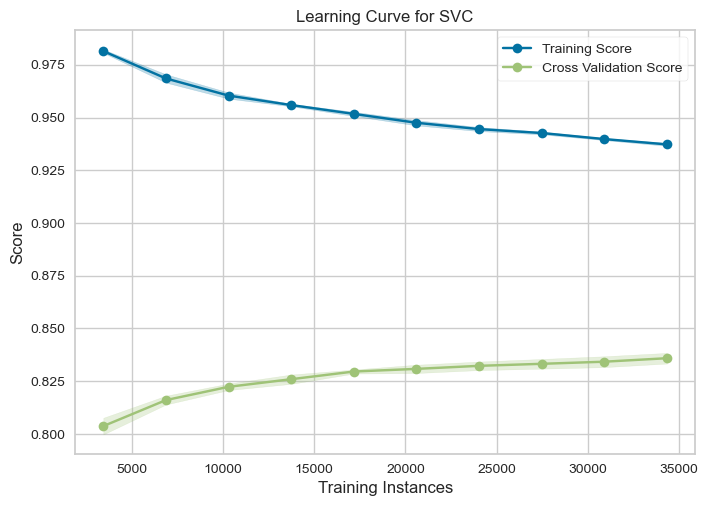

In [428]:
model = Pipeline([('tfidf', TfidfVectorizer()), ('svc', SVC(kernel = "linear"))])
visualizer = LearningCurve(
    model, train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X_train_1, y_train_1).show() 

–ö–∞–∫ –∏ –±—ã–ª–æ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–æ —Ä–∞–Ω–µ–µ, –ø–æ –≥—Ä–∞—Ñ–∏–∫—É –∫—Ä–∏–≤–æ–π –æ–±—É—á–µ–Ω–∏—è –º–æ–∂–Ω–æ —É–≤–∏–¥–µ—Ç—å, —á—Ç–æ –º–æ–¥–µ–ª—å –Ω–µ–º–Ω–æ–≥–æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∞.

**–ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤**

In [447]:
params_svc = {'svc__C': [0.01, 0.1, 1, 10, 100, 1000]}
model_svc = Pipeline([('tfidf', TfidfVectorizer()), ('svc', SVC(kernel = "linear"))])
grid_model_svc = GridSearchCV(estimator = model_svc,
                          param_grid = params_svc,
                          scoring = 'accuracy',
                          cv = 3,
                          return_train_score = True)
grid_model_svc.fit(X_train_1, y_train_1)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('svc', SVC(kernel='linear'))]),
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy')

In [449]:
cv_info = pd.DataFrame(grid_model_svc.cv_results_)[['param_svc__C', 
                                                    'mean_test_score', 
                                                    'mean_train_score', 
                                                    'rank_test_score']]
cv_info.sort_values(by = ['rank_test_score'], ascending = True, inplace = True)
cv_info

param_svc__C  mean_test_score  mean_train_score  rank_test_score
2            1         0.832910          0.943320                1
3           10         0.810107          0.978494                2
1          0.1         0.800016          0.810395                3
4          100         0.798967          0.980552                4
5         1000         0.795927          0.980644                5
0         0.01         0.635808          0.619768                6

–ü–æ–ª—É—á–∏–ª–∏, —á—Ç–æ –Ω–∞–∏–ª—É—á—à–µ–π –º–æ–¥–µ–ª—å—é –±—É–¥–µ—Ç: SVC(C = 1, kernel = "linear"). –ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä C, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–¥–±–∏—Ä–∞–ª—Å—è, —è–≤–ª—è–µ—Ç—Å—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –∫—Ä–∏–≤–∞—è –æ–±—É—á–µ–Ω–∏—è, –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω–∞—è –≤—ã—à–µ, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏.

**–ú–µ—Ç—Ä–∏–∫–∏**

In [443]:
X_test_1 = X_test['tweet_text'].to_numpy()
y_test_1 = y_test['cyberbullying_type'].to_numpy()

In [451]:
best_model_svc = grid_model_svc.best_estimator_
best_model_svc.fit(X_train_1, y_train_1)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svc', SVC(C=1, kernel='linear'))])

In [455]:
y_pred = best_model_svc.predict(X_test_1)

acc_svc = accuracy_score(y_test_1, y_pred)
pr_svc = precision_score(y_test_1, y_pred, average = 'macro')
rc_svc = recall_score(y_test_1, y_pred, average = 'macro')
f1_svc = f1_score(y_test_1, y_pred, average = 'macro')

metrics_svc = pd.DataFrame({'Linear SVM': [acc_svc, pr_svc, rc_svc, f1_svc]}, 
                           index = ['Accuracy', 'Precision', 'Recall', 'F1'])
metrics_svc

Linear SVM
Accuracy     0.836985
Precision    0.836441
Recall       0.837544
F1           0.836265

–ü–æ—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É –æ—à–∏–±–æ–∫ –¥–ª—è –ª—É—á—à–µ–≥–æ –ø–æ–Ω–∏–º–∞–Ω–∏—è —Ç–æ–≥–æ, –∫–∞–∫–∏–µ –∫–ª–∞—Å—Å—ã –º–æ–¥–µ–ª—å –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –ø—Ä–∞–≤–∏–ª—å–Ω–æ:

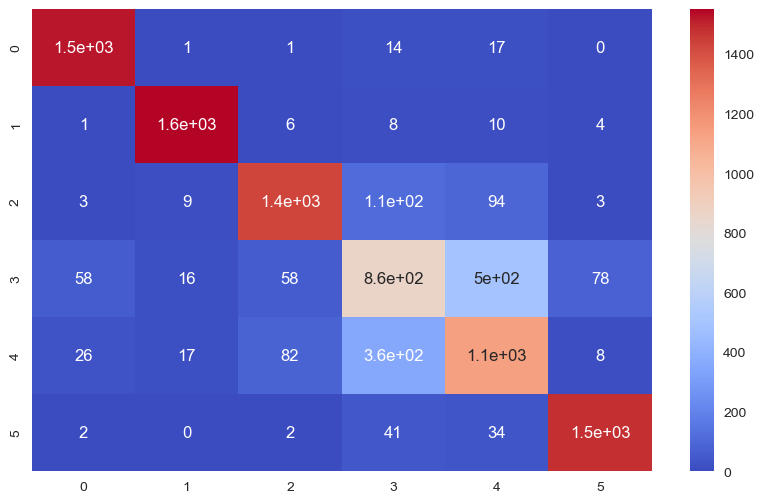

In [480]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_test_1, y_pred), cmap="coolwarm", annot = True)
plt.show()

–ü–æ –º–∞—Ç—Ä–∏—Ü–µ –æ—à–∏–±–æ–∫ –≤–∏–¥–∏–º, —á—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—à–∏–±–æ–∫ –æ—á–µ–Ω—å –º–∞–ª–æ –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –∫ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ.

–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∫—Ä–∏–≤—ã–µ ROC-AUC –∏ PR-AUC:

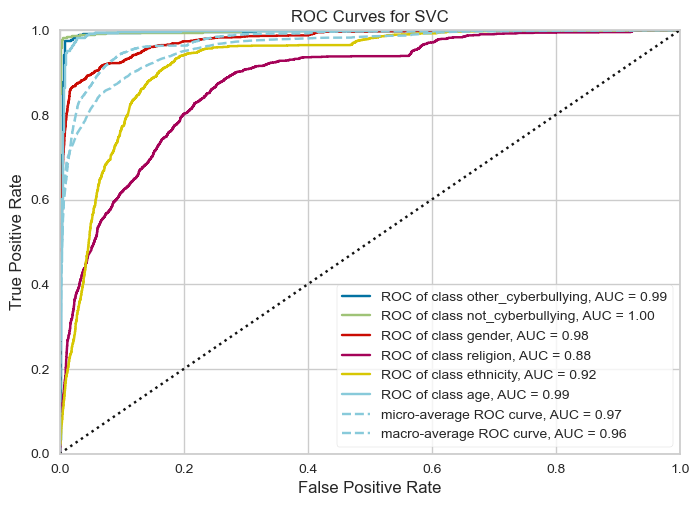

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [461]:
cls = pd.unique(y_train_1)
visualizer_roc = ROCAUC(best_model_svc, classes = cls)
visualizer_roc.fit(X_train_1, y_train_1)
visualizer_roc.score(X_test_1, y_test_1)
visualizer_roc.show()

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ ROC –∫—Ä–∏–≤—ã—Ö –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã –∫—Ä–∏–≤—ã–µ –∏ –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ —à–µ—Å—Ç–∏ –∫–ª–∞—Å—Å–æ–≤. –¢–∞–∫ –∫–∞–∫ –¥–∞–Ω–Ω—ã–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –ø—Ä–∏–º–µ–Ω–∏–º —Ç–æ–ª—å–∫–æ –∫ –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –∞–ª–≥–æ—Ä–∏—Ç–º —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞, –æ–±–æ–∑–Ω–∞—á–∞—è –Ω—É–∂–Ω—ã–π –∫–ª–∞—Å—Å –∑–∞ 0, –∞ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –∑–∞ 1, —Ç–µ–º —Å–∞–º—ã–º –ø—Ä–∏–≤–æ–¥—è –∫ –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

–ü–æ–∫–∞–∑–∞—Ç–µ–ª—å AUC‚àíROC —è–≤–ª—è–µ—Ç—Å—è –º–µ—Ä–æ–π –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ. –ó–Ω–∞—á–µ–Ω–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö [0.8, 1] –≥–æ–≤–æ—Ä–∏—Ç –æ–± –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–µ–º –∫–∞—á–µ—Å—Ç–≤–µ –º–æ–¥–µ–ª–∏.



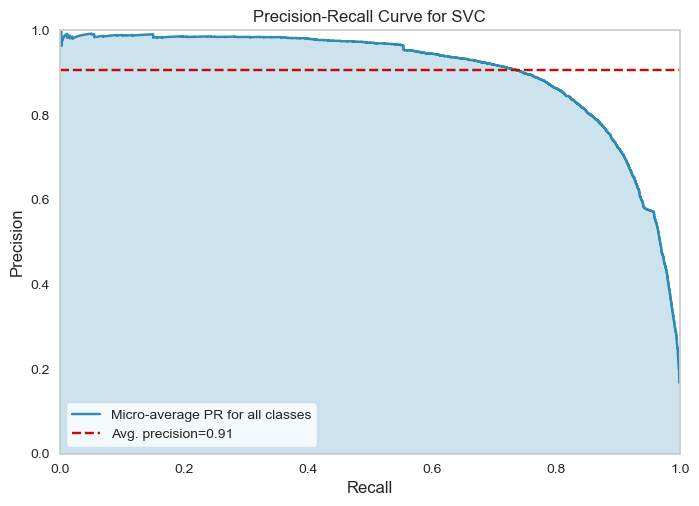

<Axes: title={'center': 'Precision-Recall Curve for SVC'}, xlabel='Recall', ylabel='Precision'>

In [462]:
visualizer_pr = PrecisionRecallCurve(best_model_svc, classes = cls)
visualizer_pr.fit(X_train_1, y_train_1)
visualizer_pr.score(X_test_1, y_test_1)
visualizer_pr.show()

PR-AUC - –º–µ—Ç—Ä–∏–∫–∞, –æ—Ç—Ä–∞–∂–∞–µ—Ç –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ –∏ –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å –∫—Ä–∏–≤—ã–µ, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ —Ä–∞–∑–ª–∏—á–Ω—ã–º –±–∞–ª–∞–Ω—Å–∞–º –∫–ª–∞—Å—Å–æ–≤ –∏ –∑–Ω–∞—á–µ–Ω–∏—è–º –ø–æ—Ä–æ–≥–∞. –ß–µ–º –≤—ã—à–µ –ø–ª–æ—â–∞–¥—å, —Ç–µ–º –ª—É—á—à–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –º–æ–¥–µ–ª—å. –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –º–µ—Ç—Ä–∏–∫–∞ —Ä–∞–≤–Ω–∞ 0.91, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ö–æ—Ä–æ—à–µ–º –∫–∞—á–µ—Å—Ç–≤–µ –º–æ–¥–µ–ª–∏.

## Gradient Boosting

**–ö—Ä–∏–≤–∞—è –æ–±—É—á–µ–Ω–∏—è**

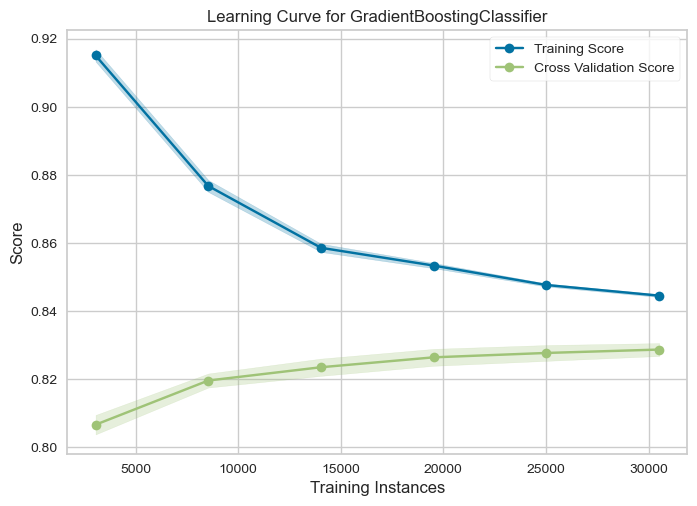

In [437]:
model = Pipeline([('tfidf', TfidfVectorizer()), ('gb', GradientBoostingClassifier())])
visualizer = LearningCurve(
    model, train_sizes=np.linspace(0.1, 1.0, 6)
).fit(X_train_1, y_train_1).show() 

**–ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤**

In [464]:
params_gb = {'gb__learning_rate': [0.01, 0.1, 1.0],
             'gb__n_estimators' : [100, 500, 1000]}
model_gb = Pipeline([('tfidf', TfidfVectorizer()), ('gb', GradientBoostingClassifier())])
grid_model_gb = GridSearchCV(estimator = model_gb,
                             param_grid = params_gb,
                             scoring = 'accuracy',
                             cv = 2,
                             return_train_score = True)
grid_model_gb.fit(X_train_1, y_train_1)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('gb', GradientBoostingClassifier())]),
             param_grid={'gb__learning_rate': [0.01, 0.1, 1.0],
                         'gb__n_estimators': [100, 500, 1000]},
             return_train_score=True, scoring='accuracy')

In [471]:
cv_info_1 = pd.DataFrame(grid_model_gb.cv_results_)[['param_gb__learning_rate', 
                                                     'param_gb__n_estimators',
                                                     'mean_test_score',
                                                     'mean_train_score',
                                                     'rank_test_score']]
cv_info_1.sort_values(by = ['rank_test_score'], ascending = True, inplace = True)
cv_info_1

param_gb__learning_rate param_gb__n_estimators  mean_test_score  \
4                     0.1                    500         0.828637   
2                    0.01                   1000         0.826908   
3                     0.1                    100         0.826567   
5                     0.1                   1000         0.824601   
1                    0.01                    500         0.815218   
6                     1.0                    100         0.809609   
7                     1.0                    500         0.809085   
8                     1.0                   1000         0.808796   
0                    0.01                    100         0.784027   

   mean_train_score  rank_test_score  
4          0.910204                1  
2          0.845753                2  
3          0.852174                3  
5          0.967919                4  
1          0.824234                5  
6          0.843368                6  
7          0.843499                7  
8          0.844862                8  
0          0.785521                9

–ü–æ–ª—É—á–∏–ª–∏, —á—Ç–æ –Ω–∞–∏–ª—É—á—à–µ–π –º–æ–¥–µ–ª—å—é –±—É–¥–µ—Ç: GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 500).

**–ú–µ—Ç—Ä–∏–∫–∏**

In [467]:
best_model_gb = grid_model_gb.best_estimator_
best_model_gb.fit(X_train_1, y_train_1)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('gb', GradientBoostingClassifier(n_estimators=500))])

In [468]:
y_pred_1 = best_model_gb.predict(X_test_1)

acc_gb = accuracy_score(y_test_1, y_pred_1)
pr_gb = precision_score(y_test_1, y_pred_1, average = 'macro')
rc_gb = recall_score(y_test_1, y_pred_1, average = 'macro')
f1_gb = f1_score(y_test_1, y_pred_1, average = 'macro')

metrics_gb = pd.DataFrame({'Gradient Boosting': [acc_gb, pr_gb, rc_gb, f1_gb]}, 
                           index = ['Accuracy', 'Precision', 'Recall', 'F1'])
metrics_gb

Gradient Boosting
Accuracy            0.838348
Precision           0.851120
Recall              0.838411
F1                  0.838484

–ü–æ—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É –æ—à–∏–±–æ–∫ –¥–ª—è –ª—É—á—à–µ–≥–æ –ø–æ–Ω–∏–º–∞–Ω–∏—è —Ç–æ–≥–æ, –∫–∞–∫–∏–µ –∫–ª–∞—Å—Å—ã –º–æ–¥–µ–ª—å –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –ø—Ä–∞–≤–∏–ª—å–Ω–æ:

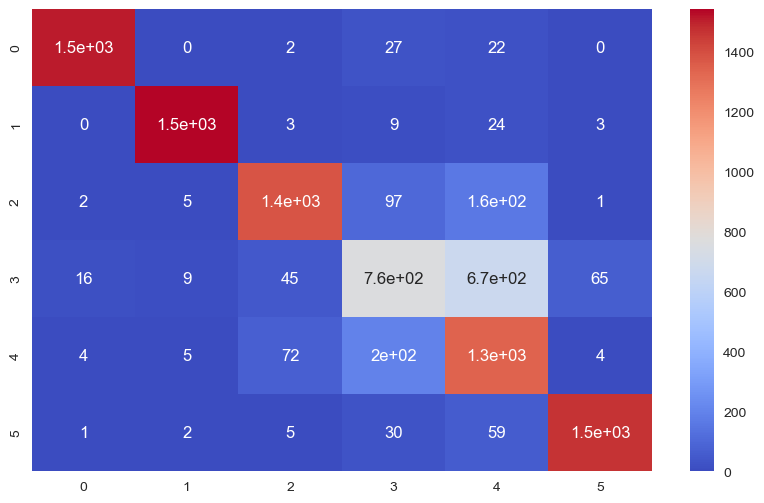

In [482]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_test_1, y_pred_1), cmap="coolwarm", annot = True)
plt.show()

–ü–æ –º–∞—Ç—Ä–∏—Ü–µ –æ—à–∏–±–æ–∫ –≤–∏–¥–∏–º, —á—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—à–∏–±–æ–∫ –æ—á–µ–Ω—å –º–∞–ª–æ –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –∫ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ.

–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∫—Ä–∏–≤—ã–µ ROC-AUC –∏ PR-AUC:

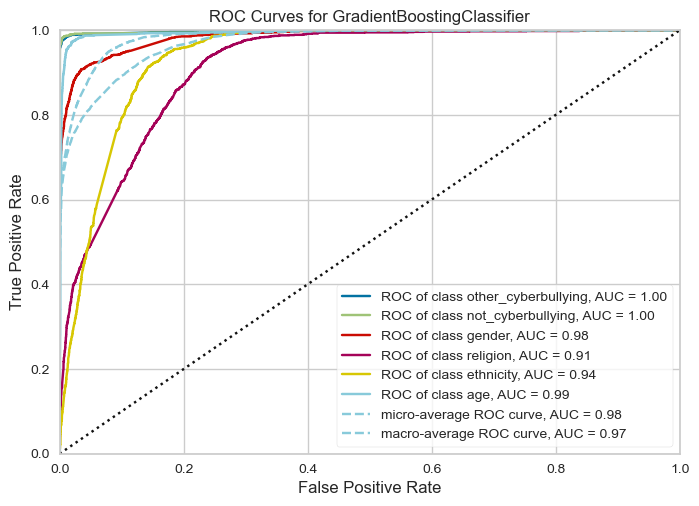

<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [469]:
cls = pd.unique(y_train_1)
visualizer_roc_1 = ROCAUC(best_model_gb, classes = cls)
visualizer_roc_1.fit(X_train_1, y_train_1)
visualizer_roc_1.score(X_test_1, y_test_1)
visualizer_roc_1.show()

–ó–Ω–∞—á–µ–Ω–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö [0.9, 1] –≥–æ–≤–æ—Ä–∏—Ç –æ–± –æ—Ç–ª–∏—á–Ω–æ–º –∫–∞—á–µ—Å—Ç–≤–µ –º–æ–¥–µ–ª–∏.

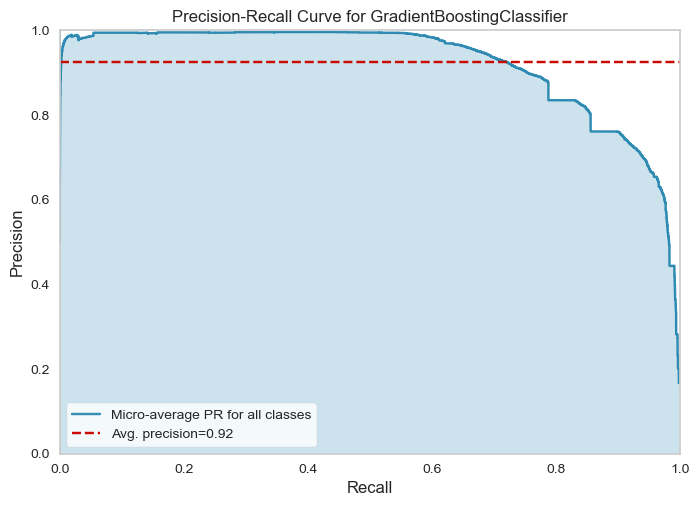

<Axes: title={'center': 'Precision-Recall Curve for GradientBoostingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [470]:
visualizer_pr_1 = PrecisionRecallCurve(best_model_gb, classes = cls)
visualizer_pr_1.fit(X_train_1, y_train_1)
visualizer_pr_1.score(X_test_1, y_test_1)
visualizer_pr_1.show()

–ú–µ—Ç—Ä–∏–∫–∞ PR-AUC —Ä–∞–≤–Ω–∞ 0.92, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ö–æ—Ä–æ—à–µ–º –∫–∞—á–µ—Å—Ç–≤–µ –º–æ–¥–µ–ª–∏.

## –ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–π –≤—ã–≤–æ–¥

–ü–æ—Å–ª–µ –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è –ø–æ–ª–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –æ–±–µ–∏—Ö –º–æ–¥–µ–ª–µ–π, –∞ —Ç–∞–∫–∂–µ –ø–æ–¥–±–æ—Ä–∞ –∏—Ö –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –ø–æ–ª—É—á–∏–ª–∏, —á—Ç–æ –æ–±–µ –º–æ–¥–µ–ª–∏, –∫–∞–∫ –º–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤, —Ç–∞–∫ –∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥, –¥–∞—é—Ç –ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ. –°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –≤—ã–±–æ—Ä –º–æ–¥–µ–ª–∏ —Å—Ç–æ–∏—Ç –¥–µ–ª–∞—Ç—å –Ω–∞ –æ—Å–Ω–æ–≤–µ –µ–µ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏. –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –±–æ–ª–µ–µ "–ø—Ä–æ—Å—Ç–æ–π" –º–æ–¥–µ–ª—å—é —è–≤–ª—è–µ—Ç—Å—è –º–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤.

# –ü—Ä–æ–≥–Ω–æ–∑

## –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ

–î–ª—è –µ—â–µ –±–æ–ª—å—à–µ–≥–æ –ø–æ–≤—ã—à–µ–Ω–∏—è —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏, –æ–±—É—á–∏–º –µ–µ –Ω–∞ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ.

In [483]:
X_1 = X['tweet_text'].to_numpy()
y_1 = y['cyberbullying_type'].to_numpy()

best_model_svc = grid_model_svc.best_estimator_
best_model_svc.fit(X_1, y_1)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svc', SVC(C=1, kernel='linear'))])

## –°–æ–∑–¥–∞–Ω–∏–µ –Ω–æ–≤—ã—Ö —Ç–µ—Å—Ç–æ–≤

In [503]:
test_1 = pd.DataFrame(['You look so amazing today üòçüòçüòçüòçüòç i dont believe u exist', 
                       'i dont understand why you like this color so much ?? only stupid people like it'], 
                      columns = ['test'])
test_1

test
0  You look so amazing today üòçüòçüòçüòçüòç i dont believe...
1  i dont understand why you like this color so m...

–î–∞–Ω–Ω—ã–µ —Ç–µ—Å—Ç—ã –ø—Ä–µ–¥–ø–æ–ª–æ–≥–∞—é—Ç –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫ –∫–ª–∞—Å—Å–∞–º 'not_cyberbullying' –∏ 'other_cyberbullying' —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ.

–ü—Ä–æ–≤–µ–¥–µ–º –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É —Ç–µ—Å—Ç–∞:

In [504]:
test_1 = text_preprocessing(test_1['test']).to_numpy()
test_1

array(['look amazing today dont believe u exist',
       'dont understand like color much stupid people like'], dtype=object)

–°–¥–µ–ª–∞–µ–º –ø—Ä–æ–≥–Ω–æ–∑:

In [505]:
best_model_svc.predict(test_1)

array(['not_cyberbullying', 'other_cyberbullying'], dtype=object)

–ú–æ–∂–Ω–æ —É–≤–∏–¥–µ—Ç—å, —á—Ç–æ –º–æ–¥–µ–ª—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–ª–∞ –æ–±–∞ –∫–ª–∞—Å—Å–∞, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –µ—ë —Ä–∞–±–æ—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏.

# –í—ã–≤–æ–¥

–í –Ω–∞—Å—Ç–æ—è—â–µ–µ –≤—Ä–µ–º—è, –≤—Ä–µ–º—è –æ—Å–æ–±–æ –∞–∫—Ç–∏–≤–Ω–æ–≥–æ —Ä–∞–∑–≤–∏—Ç–∏—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Å–æ—Ü–∏–∞–ª—å–Ω—ã—Ö —Å–µ—Ç–µ–π, –ø—Ä–æ–±–ª–µ–º–∞ –∫–∏–±–µ—Ä–±—É–ª–ª–∏–Ω–≥–∞ —Å—Ç–∞–ª–∞ –∫–∞–∫ –Ω–∏–∫–æ–≥–¥–∞ –∞–∫—Ç—É–∞–ª—å–Ω–æ–π. –° —Ä–æ—Å—Ç–æ–º —á–∏—Å–ª–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å–µ—Ç–∏ –ò–Ω—Ç–µ—Ä–Ω–µ—Ç –∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –≤—Ä–µ–º–µ–Ω–∏, –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ –∏–º–∏ –≤ –≤–∏—Ä—Ç—É–∞–ª—å–Ω–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ, –≤–æ–∑—Ä–∞—Å—Ç–∞–µ—Ç –∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Å—Ç–æ–ª–∫–Ω—É—Ç—å—Å—è —Å –∞–≥—Ä–µ—Å—Å–∏–≤–Ω—ã–º–∏ –∏–ª–∏ –æ—Å–∫–æ—Ä–±–∏—Ç–µ–ª—å–Ω—ã–º–∏ –≤—ã—Å–∫–∞–∑—ã–≤–∞–Ω–∏—è–º–∏. –ß—Ç–æ–±—ã —Å–¥–µ–ª–∞—Ç—å –ò–Ω—Ç–µ—Ä–Ω–µ—Ç-—Å—Ä–µ–¥—É –Ω–∞–∏–±–æ–ª–µ–µ –∑–¥–æ—Ä–æ–≤–æ–π –∏ –±–µ–∑–æ–ø–∞—Å–Ω–æ–π, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ—á–µ–Ω—å —Ç—â–∞—Ç–µ–ª—å–Ω–æ –º–æ–¥–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –≤—Å–µ –ø–æ—Å—Ç—ã –∏ —Å–æ–æ–±—â–µ–Ω–∏—è —Å–æ—Ü–∏–∞–ª—å–Ω—ã—Ö —Å–µ—Ç–µ–π. 

–ò–∑-–∑–∞ –±–æ–ª—å—à–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–æ–¥–æ–±–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤, –æ—á–µ–Ω—å —Å–ª–æ–∂–Ω–æ –ø—Ä–æ–≤–æ–¥–∏—Ç—å –º–æ–¥–µ—Ä–∞—Ü–∏—é –≤—Ä—É—á–Ω—É—é. –ò–º–µ–Ω–Ω–æ –ø–æ—ç—Ç–æ–º—É –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∞–≤—Ç–æ–º–∞—Ç–∏–∑–∏—Ä–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–π –ø—Ä–æ—Ü–µ—Å—Å. –ú–æ–¥–µ–ª—å —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω–Ω–∞—è –≤ –¥–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –Ω–∞–ª–∏—á–∏–µ –∫–∏–±–±–µ—Ä–±—É–ª–ª–∏–Ω–≥–∞, –∞ —Ç–∞–∫–∂–µ –µ–≥–æ —Ç–∏–ø. –¢–∞–∫–∞—è –º–æ–¥–µ–ª—å –º–æ–∂–µ—Ç –±—ã—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∞, –Ω–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ –±–æ—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –±—ã –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ —É–¥–∞–ª—è–ª–∏ –∞–≥—Ä–µ—Å—Å–∏–≤–Ω—ã–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏.

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ, –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ –≤ –¥–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ, –∏–º–µ–µ—Ç –±–æ–ª—å—à–æ–π –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª –∏ –º–æ–∂–µ—Ç –±—ã—Ç—å –∏—Å—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–æ –Ω–∞ –±–ª–∞–≥–æ –æ–±—â–µ—Å—Ç–≤–∞.